<p style="font-family: Arial; font-size:2.0em;color:#2462C0; text-align: center; font-style:bold"><br> EDA on Credit Card Fraud Detection</p><br>

# Dataset
Credit Card Fraud Detection
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
It is important for credit card companies enable to detect fraudulent credit card transactions. Therefore, customers are not charged for items that they did not purchase. Our goal in this project is to do explanatory data analysis of credit card fraud detection data.

# Import Libraries

In [112]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# A first look at the data

In [113]:
# Reading dataset using pandas. 
#data = pd.read_csv('https://query.data.world/s/mhkt7ufpk27744sbzwokvmr7af23p3')
data=pd.read_csv('CC.csv',index_col=None)
data.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Explore the Dataset

In [114]:
data.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [115]:
# Now, checking the dimention of the dataset and the first 5 observations of the data
data.shape

(284807, 32)

**In our dataset, we have 284807 observations and 32 columns. Let's check the columns name.**

## Exploring columns

In [116]:
#Checking columns name
columns_name=data.columns
columns_name

Index(['Unnamed: 0', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount', 'Class'],
      dtype='object')


**We have 31 features going from time and all the way going through amount, class. Here, we have V1 through V28 these are the 
actually the result of a PCA dimentionality reduction that was used in order to protect sensitive information in this dataset.
For example, we don't want to expose the identity of the individual who made the credit card transaction also don't want to 
expose stuff like location and so on.**


In [98]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  284807 non-null  int64  
 1   Time        284807 non-null  float64
 2   V1          284807 non-null  float64
 3   V2          284807 non-null  float64
 4   V3          284807 non-null  float64
 5   V4          284807 non-null  float64
 6   V5          284807 non-null  float64
 7   V6          284807 non-null  float64
 8   V7          284807 non-null  float64
 9   V8          284807 non-null  float64
 10  V9          284807 non-null  float64
 11  V10         284807 non-null  float64
 12  V11         284807 non-null  float64
 13  V12         284807 non-null  float64
 14  V13         284807 non-null  float64
 15  V14         284807 non-null  float64
 16  V15         284807 non-null  float64
 17  V16         284807 non-null  float64
 18  V17         284807 non-null  float64
 19  V1

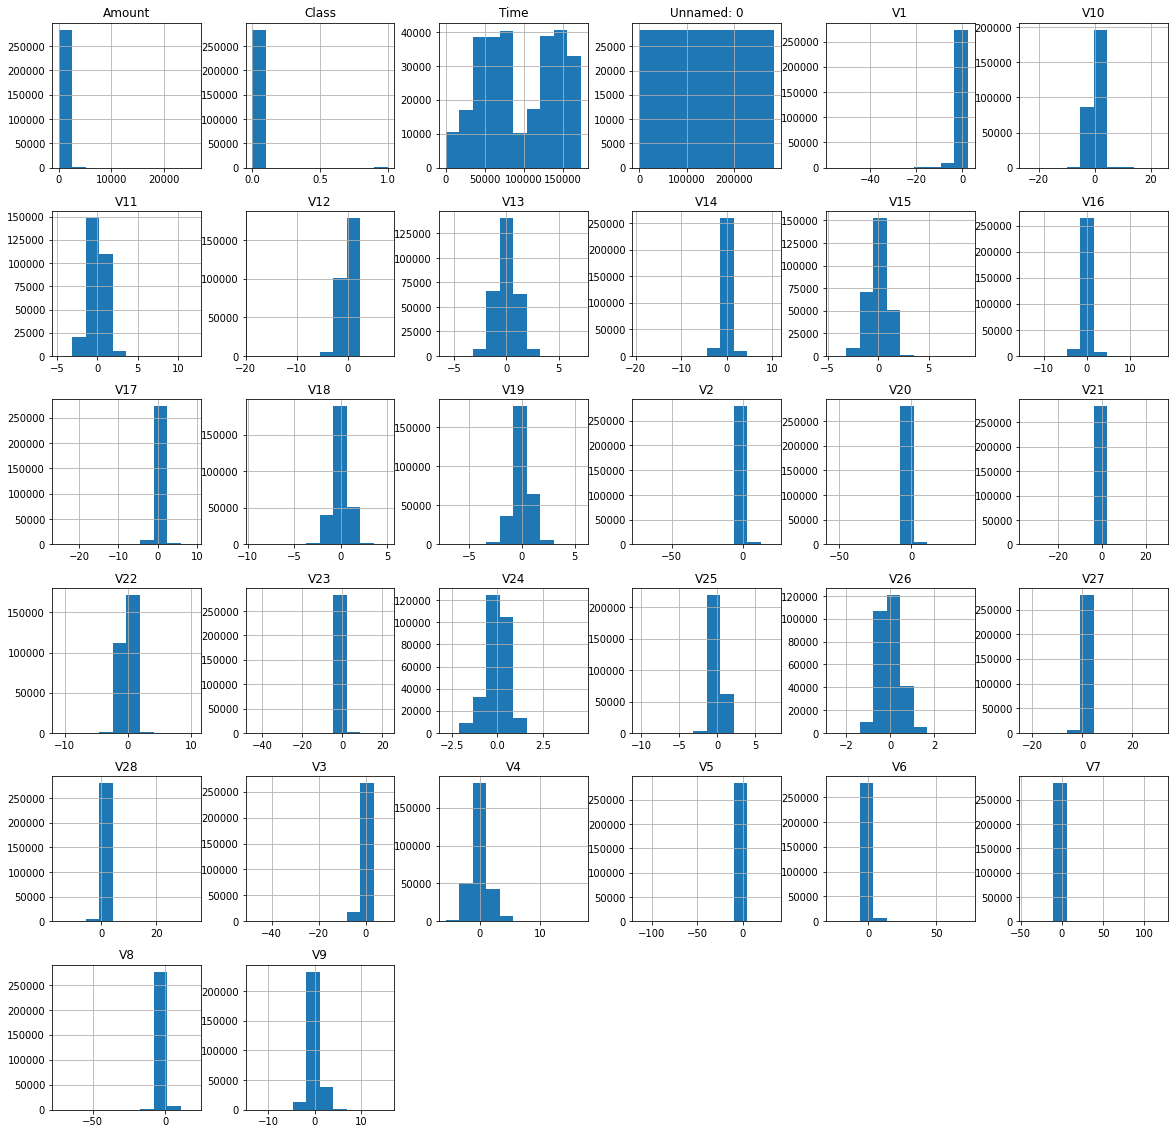

In [99]:
# Plot histogram of each columns for visualization
data.hist(figsize=(20,20))
plt.show()

**Here is all of the histograms, it looks like most of our V's are clustered right around 0 with some fairly large outlier
or may be no outliers some cases. Let's have a look class column closely.**

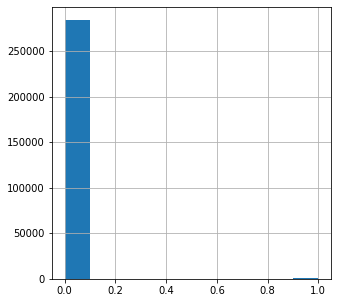

In [100]:
data['Class'].hist(figsize=(5,5))
plt.show()


**As you can see the above figure, there are very less number of 1 values or fraudulent transactions to our valid transaction.
It's kind of surprising although it makes sense since this is real world data.**

In [101]:
# No of fraud cases
fraud=data[(data['Class']==1)]
print('No of fraud cases: {}'.format(len(fraud)))

valid=data[data['Class']==0]
print('No of fraud cases: {}'.format(len(valid)))

No of fraud cases: 492
No of fraud cases: 284315


In [102]:
## We need to analyze more amount of information from the transaction data
#How different are the amount of money used in different transaction classes?
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [103]:
valid.Amount.describe()


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

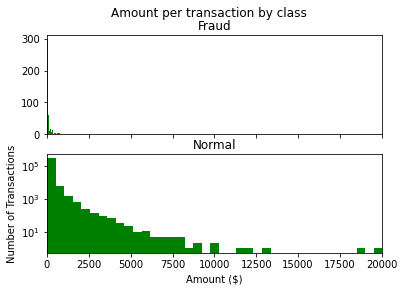

In [104]:
# Let' see the visualization
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins, color='green')
ax1.set_title('Fraud')
ax2.hist(valid.Amount, bins = bins, color='green')
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

In this graph, you can see the fraud transaction is very small amount. The case of normal transaction the amount is very big amount.
The hightest number is around 50. 

In [105]:
# Checking columns statistical description
print(data.describe())

          Unnamed: 0           Time            V1            V2            V3  \
count  284807.000000  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05   
mean   142404.000000   94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15   
std     82216.843396   47488.145955  1.958696e+00  1.651309e+00  1.516255e+00   
min         1.000000       0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01   
25%     71202.500000   54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01   
50%    142404.000000   84692.000000  1.810880e-02  6.548556e-02  1.798463e-01   
75%    213605.500000  139320.500000  1.315642e+00  8.037239e-01  1.027196e+00   
max    284807.000000  172792.000000  2.454930e+00  2.205773e+01  9.382558e+00   

                 V4            V5            V6            V7            V8  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   2.782312e-15 -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16   
std    1.415869e+00  1.380247e+00

**This describe function returns the mean, max, min and count of each column. Here, you can see the count of each columns are same.
That means we don't have any missing values in our dataset. In class column, we have max 1 that's the fraud transaction and min 0 that's a not fraud. if we see the mean which is close to o. That means we have way more valid transaction than we do fraudulent transaction**

## Checking Missing values

In [106]:
## checking another way missing values in our dataset
data.isnull().sum()

Unnamed: 0    0
Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
dtype: int64

## Checking for duplicate rows


In [107]:
number_duplicated_rows = data.duplicated().sum()
print("Number of duplicated rows: ", number_duplicated_rows)

Number of duplicated rows:  0


In [108]:
# small sample of dataset
#data=data.sample(frac=0.1, random_state = 1)
#print(data.shape)

## Checking Outlier


In [109]:
outlier_fraction= len(fraud) / float(len(valid))
print(outlier_fraction)


0.0017304750013189597


## Correlation Check

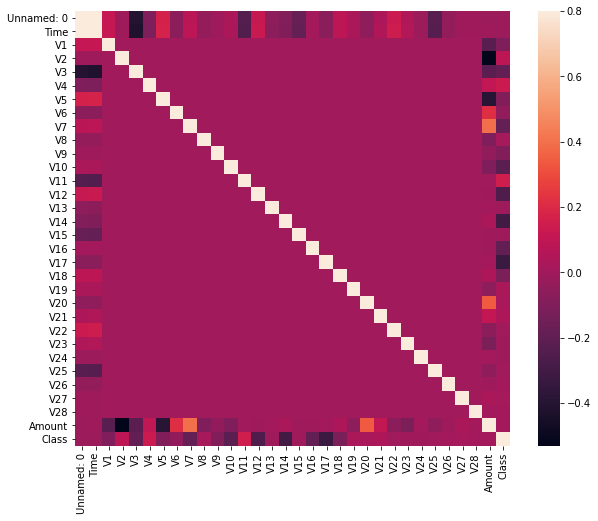

In [110]:
corr=data.corr()
fig= plt.figure(figsize=(10,8))
#sns.heatmap(corr, vmax=1,vmin= -1, square=True)
sns.heatmap(corr, vmax=.8, square=True)

plt.show()


**In the correlation plot we can see there are lots of values close to 0 most of them are fairly unrelated to other variaables.
However, we do care about class. We can see there are some variation in the relatioships between class and other variables.
The lighter one is positive and darker one is negative strong correlation. Here v11 has positive and V17 has strong negative correlation. On the other hand there are not any significant correlations with time and amount which we have to do further analysis. Since we don,t have any multicollinearity in our dataset, we don't have remove any columns from our dataset**

# Dataset formation for modeling

In [111]:
# get all the columns from the dataframe
columns=data.columns.tolist()
columns=[x for x in columns if x not in ['Class']]
# Store the variable we will be predicting on
target='Class'
X=data[columns]
Y=data[target]
# Checking X an Y
print(X.shape)
print(Y.shape)

(284807, 31)
(284807,)


Our EDA is done and the dataset is ready to do modeling.